# **STEP 1:** PRE-PROCESSING THE DATA

### Get the Data:

In [180]:
# Python ≥3.5 is required
#import sys #
# Scikit-Learn ≥0.20 is required
import sklearn # general ml package

# Common imports
import numpy as np # fundamental package for scientific computing
import os # to run file I/O operation 

# to make this notebook's output stable across runs
# any number will do, as long as it is used consistently
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

In [181]:
import tarfile # to support compressed (tar) files
from six.moves import urllib # support URL download

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """Fetch housing data from a remote URL to Colab file system"""
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [182]:
import pandas as pd # Pandas module to enable data manipulation

def load_housing_data(housing_path=HOUSING_PATH):
    """Load Housing Data into Workspace from a CSV"""
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing_data = load_housing_data()
# Display the first n rows of the data. (n=5 by default, we will use 10 rows)
housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [183]:
# Provide a quick summary of the data including name of features, count, and type
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [184]:
# Provide some basic statistics about the dataset
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


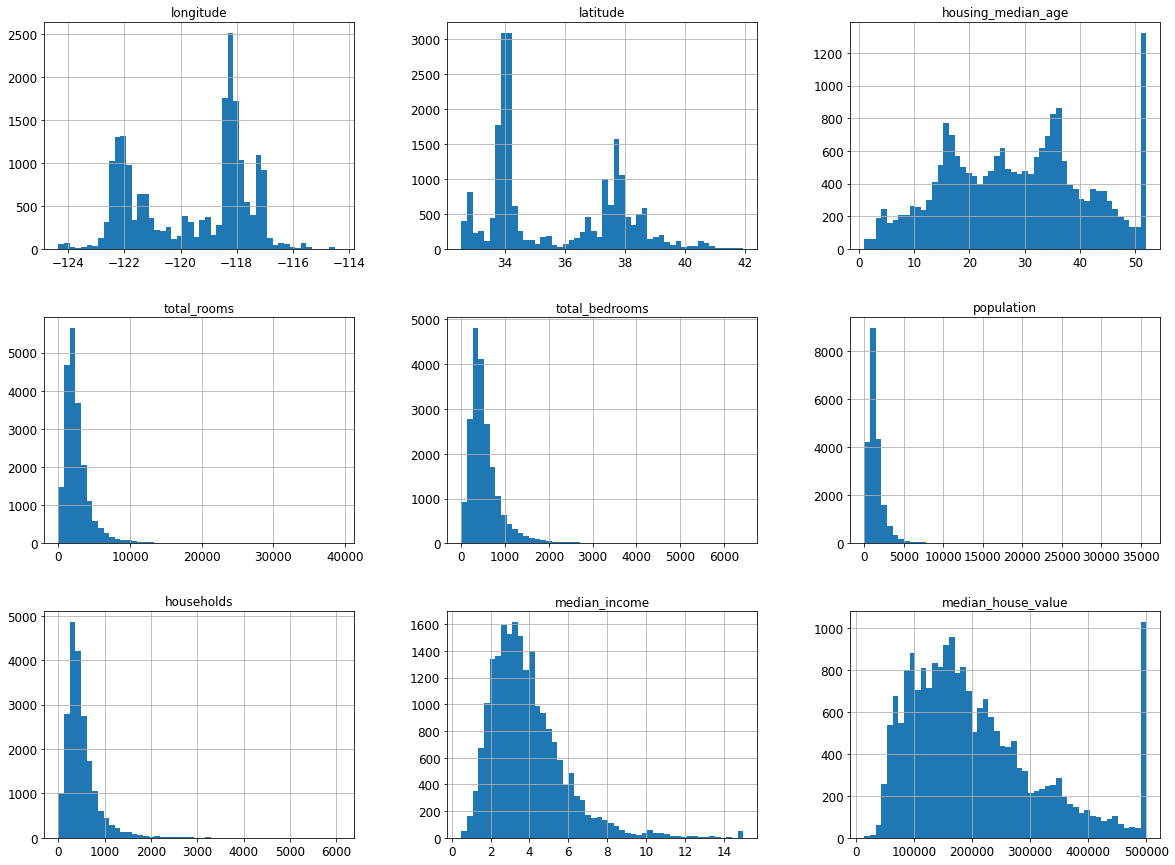

In [185]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_data.hist(bins=50, figsize=(20,15))
plt.show()

No need for a test set since this is a clustering problem, so we're done with this part. 

### Discover & Visualize the Data:

Calculate the correlations to see how each feature correlates to the median house value.

In [186]:
corr_matrix = housing_data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Now we see that median income, total rooms, and the median house age have the strongest correlation with the house value. Graph scatter plots of these features to better visualize the relationship.

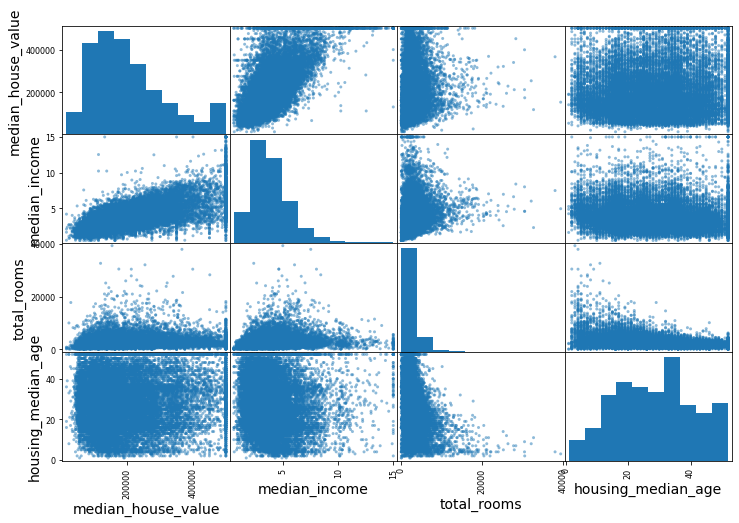

In [187]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing_data[attributes], figsize=(12, 8));

Since median income has the strongest correlation, plot a bigger version to better understand the relationship with median house value.

(0.0, 16.0, 0.0, 550000.0)

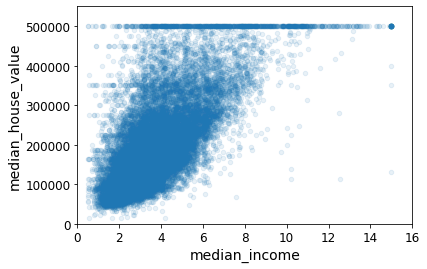

In [188]:
housing_data.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

From this plot, median income has a strong linear correlation with house value. However, with house values of 500,000, median income is clustered around 3-11, with no apparent relationship (horizontal line with same density of data points).

**Feature Engineering**

In [189]:
housing_data["rooms_per_household"] = housing_data["total_rooms"]/housing_data["households"]
housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"]/housing_data["total_rooms"]
housing_data["population_per_room"]=housing_data["population"]/housing_data["total_rooms"]

corr_matrix = housing_data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.688075
rooms_per_household    0.151948
total_rooms            0.134153
housing_median_age     0.105623
households             0.065843
total_bedrooms         0.049686
population            -0.024650
population_per_room   -0.033557
longitude             -0.045967
latitude              -0.144160
bedrooms_per_room     -0.255880
Name: median_house_value, dtype: float64

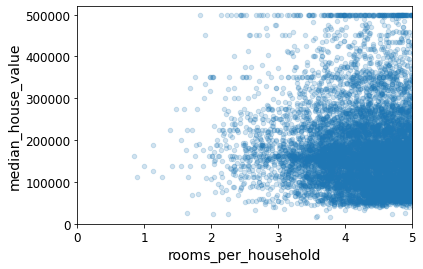

In [190]:
housing_data.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

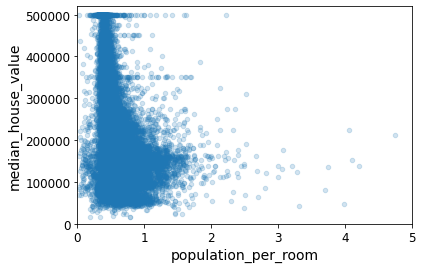

In [191]:
housing_data.plot(kind="scatter", x="population_per_room", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

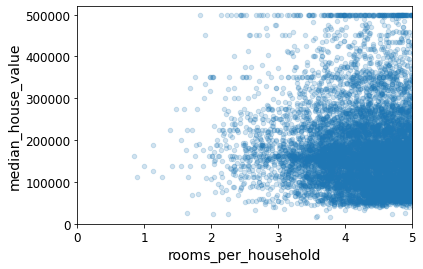

In [192]:
housing_data.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [193]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_room
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,0.619576
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,2.894913
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.018109
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,0.435523
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,0.516013
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,0.656865
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,392.631579


### Clean the Data:

In [194]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Pipeline for categorical features
cat_pipeline = Pipeline([
                         ('encoder', OneHotEncoder(sparse=False)),
                         ('median_imputer', SimpleImputer(strategy="median")),
                         ('std_scaler', StandardScaler()),
])

# Pipeline for numerical features
num_pipeline = Pipeline([
                         ('mean_imputer', SimpleImputer(strategy="median")),
                         ('std_scaler', StandardScaler()),
])

# Separate numerical columns from categorical ones
housing_num = housing_data.select_dtypes(include=[np.number]).columns
housing_cat = housing_data.select_dtypes(include=['object']).columns
print(housing_cat)


# Create single pipeline for all feautres
full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, housing_num),
                                   ("cat", cat_pipeline, housing_cat),
])

# Apply pipeline to data 
housing_prepared = full_pipeline.fit_transform(housing_data)
rows, cols = housing_prepared.shape

Index(['ocean_proximity'], dtype='object')


# **STEP 2:** IMPLEMENTING K-MEANS

In [126]:
import sys 

# Main function to run the K-Means algorithm
# Returns a list of the final centroids 
def k_means(dataset, k, p):
  # Start by randomly initializing k centroids, store index in dataset
  rows, cols = dataset.shape
  centroids = initialize_centroids(rows, k, dataset)

  # Continue recalculating distance values, reassigning centroids until no changes occur
  centroids_changing = True
  while centroids_changing == True:
    # Calculate closest distance centroid for each row in dataset
    dist_centroid_pairs = calculate_dist_centroid_pairs(centroids, dataset, k, p, rows)
    # Calculate new centroid locations
    new_centroids = recalculate_centroids(dist_centroid_pairs, k, dataset)

    # Check if the centroids are the same (no changes)
    if no_changes_centroids(centroids, new_centroids):
      centroids_changing = False
    
    centroids = new_centroids
  
  # return final centroids along with the final distance pairs linking data rows to centroids
  # this helps us calculate the SSE, mean, standard deviation in later steps
  return centroids, dist_centroid_pairs

# helper function to initialize centroids as k random, unique rows from dataset
def initialize_centroids(rows, k, dataset):
  centroids = []
  # Choose k random rows in dataset to be initial centroids
  indices = np.random.choice(rows, size=k, replace=False)

  # get the actual row of data to store as the centroid
  for i in range(k):
    index = indices[i]
    centroid = dataset[index]
    centroids.append(centroid)
  
  return centroids

def calculate_dist_centroid_pairs(centroids, dataset, k, p, rows):
  pairs = []
  # find the closest centroid to each datapoint
  for i in range(rows):
    minDist = sys.maxsize
    minCentroid = -1

    for j in range(k):
      # call helper function to calculate distance between specific centroid and data point
      dist = calculate_distance(p, centroids[j], dataset[i])
      if dist < minDist:
        minDist = dist
        minCentroid = j

    # create (row, centroid) pair
    # centroid is the index in centroids list *NOT* actual data values
    # enables us to recalculate distance values more efficiently
    pairs.append(tuple((i, minCentroid)))
  
  return pairs

# helper function to calculate the next centroids
# takes the average of all features within a cluster
# assigns new centroid as the average
def recalculate_centroids(pairs, k, dataset):
  n = dataset[0].size
  centroids = []
  for i in range(k):
    count = 0
    sums = [0] * 17
    # calculate average of *all* features to determine next centroid
    for r in range(rows):
      if pairs[r][1] == i:
        for c in range(n):
          sums[c] += dataset[pairs[r][0]][c]
          count = count + 1
    # divide each feature by number of data in cluster
    for x in range(len(sums)):
      sums[x] = sums[x]/count
    
    centroids.append(sums)
  
  return centroids

# helper function to get the distance between a particular point and centroid
def calculate_distance(p, centroid, point):
  n = len(point)
  # Distance calculation for Sup Distance
  if(p == -1):
    max = 0.0
    for i in range(n):
      dist = abs(centroid[i] - point[i])
      if(dist > max):
        max = dist
    
    return max
  # Distance calculation for Manhattan, Euclidean
  # Iterate through n features in centroid, datum to calculate distance
  sum = 0.0
  for i in range(n):
    # calculate xi-yi
    dist = centroid[i] - point[i]
    dist = abs(dist)
    # raise to pth power
    dist = pow(dist, p)
    sum += dist

  # take the pth root
  sum = sum ** (1.0/p)
  return sum

#works
def no_changes_centroids(old_centroids, new_centroids):
  return np.array_equal(old_centroids, new_centroids)

Now test the K-Means implementation with test values for k = 2, p = 1

In [241]:
k = 2
p = 1
final_centroids, final_pairs = k_means(housing_prepared,k, p)

for i in range(k):
  print("Centroid[" +str(i+1)+ "]: " + str(final_centroids[i]))

Centroid[1]: [0.04646673296387061, -0.047888637729967674, -0.000457943441989547, 0.0022368931763146376, 0.003937239516615764, 0.005711066702058449, 0.003911471146813824, 0.0022913857242724675, 0.005205832160741708, -0.004728093103783971, 0.0064193652631551424, 0.0003920306069049715, 0.02434916274438817, -0.015017500073281061, 0.0007018695167982667, -0.02078025083247786, 0.004213724074618447]
Centroid[2]: [-0.060620512276671326, 0.06247552961555875, 0.0005974331371378072, -0.0029182514372554746, -0.005136523728465679, -0.007450659149938674, -0.0051029063063167375, -0.0029893424299239977, -0.006791530031945592, 0.006168271530215715, -0.008374705642553068, -0.000511443234823324, -0.03176592424135598, 0.019591834619943207, -0.0009156591597003305, 0.027109920804670316, -0.005497225556924417]


# **Step 3:** Clustering Housing Into Regions

### Calculate Sum Squared Error (SSE):

In [242]:
sse_list = []
def calculate_sse(centroids, dataset, pairs):
  sum = 0
  for pair in range(len(pairs)):
    # calculate distance between centroid at location specified by 2nd term in pair and row in dataset specified by first
    for feature in range(dataset[0].size):
      locA, locB = pairs[pair]
      dist = dataset[locA][feature] - centroids[locB][feature]
      dist = abs(dist)
      dist = pow(dist, 2)
      sum += dist

  return sum

# calculate and return sse
sse = calculate_sse(final_centroids, housing_prepared, final_pairs)
print("SSE: " + str(sse))
sse_list.append(sse)

SSE: 345650.0724642706


### Calculate Cluster Means:

Since centroids were calculated for each cluster as the averages of all points in the cluster, the cluster means are simply the centroid values. Averages ignored for ocean proximity because we used OneHotEncoder.

In [243]:
def print_cluster_mean(centroids):
  for k in range(len(centroids)):
      print("Mean values for cluster[" + str(k+1) + "]:\n")
      print("Longitude: "+ str(centroids[k][0]))
      print("Latitude: " + str(centroids[k][1]))
      print("Housing Median Age: " + str(centroids[k][2]))
      print("Total Rooms: " + str(centroids[k][3]))
      print("Total Bedrooms: " + str(centroids[k][4]))
      print("Population: " + str(centroids[k][5]))
      print("Households: " + str(centroids[k][6]))
      print("Median Income: " + str(centroids[k][7]))
      print("Median House Value: " + str(centroids[k][8]) + "\n")

print_cluster_mean(final_centroids)

Mean values for cluster[1]:

Longitude: 0.04646673296387061
Latitude: -0.047888637729967674
Housing Median Age: -0.000457943441989547
Total Rooms: 0.0022368931763146376
Total Bedrooms: 0.003937239516615764
Population: 0.005711066702058449
Households: 0.003911471146813824
Median Income: 0.0022913857242724675
Median House Value: 0.005205832160741708

Mean values for cluster[2]:

Longitude: -0.060620512276671326
Latitude: 0.06247552961555875
Housing Median Age: 0.0005974331371378072
Total Rooms: -0.0029182514372554746
Total Bedrooms: -0.005136523728465679
Population: -0.007450659149938674
Households: -0.0051029063063167375
Median Income: -0.0029893424299239977
Median House Value: -0.006791530031945592



### Calculate Cluster Standard Deviations:

In [244]:
import math 

def calculate_standard_deviation(centroids, dataset, pairs):
  standard_deviations = []
  for k in range(len(centroids)):
    # initialize empty array of size 17 (number of features) to store the sums
    sums = [0] * 17
    n = 0
    for pair in range(len(pairs)):
      if pairs[pair][1] == k:
        # calculate distance between centroid and current datapoint we're iterating on
        # for each feature and then store result in sums array
        for feature in range(dataset[0].size):
          locA, locB = pairs[pair]

          dist = dataset[locA][feature] - centroids[locB][feature]
          dist = pow(dist, 2)
          sums[feature] += dist
          n = n + 1
    
    for s in range(len(sums)):
      sums[s] = sums[s] / n
      sums[s] = math.sqrt(sums[s])

    standard_deviations.append(sums)

  return standard_deviations

# Call function to calculate standard deviations for each feature in each cluster
centroids_std = calculate_standard_deviation(final_centroids, housing_prepared, final_pairs)

def print_centroids_std(final_centroids, k):
  for k in range(len(final_centroids)):
    centroid = centroids_std[k]
    print("Standard deviation values for cluster[" + str(k+1) + "]:\n")
    print("Longitude: "+ str(centroids_std[k][0]))
    print("Latitude: " + str(centroids_std[k][1]))
    print("Housing Median Age: " + str(centroids_std[k][2]))
    print("Total Rooms: " + str(centroids_std[k][3]))
    print("Total Bedrooms: " + str(centroids_std[k][4]))
    print("Population: " + str(centroids_std[k][5]))
    print("Households: " + str(centroids_std[k][6]))
    print("Median Income: " + str(centroids_std[k][7]))
    print("Median House Value: " + str(centroids_std[k][8]) + "\n")


print_centroids_std(final_centroids, k)

Standard deviation values for cluster[1]:

Longitude: 0.2018549569373222
Latitude: 0.19603519275549094
Housing Median Age: 0.23239214430358962
Total Rooms: 0.26044689846348273
Total Bedrooms: 0.26122374858898406
Population: 0.25838239503265115
Households: 0.25616525141220714
Median Income: 0.2466510549480979
Median House Value: 0.23680768118295664

Standard deviation values for cluster[2]:

Longitude: 0.2642096278740253
Latitude: 0.26841138311576807
Housing Median Age: 0.25516095660240756
Total Rooms: 0.2168896205413846
Total Bedrooms: 0.21552525330526476
Population: 0.21972105435042072
Households: 0.22330859612195803
Median Income: 0.23699461453699794
Median House Value: 0.24949416672264993



### K = 2 Clusters And Analysis

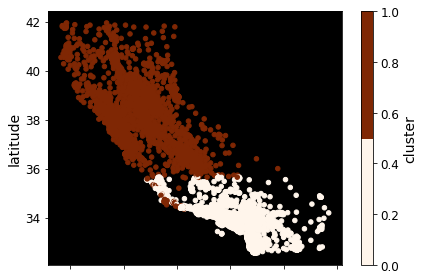

In [260]:
import matplotlib.image as mpimg
copy = housing_data.copy()

# append the cluster values to original dataset so we can plot them together
cluster_values = []
for x in range(len(final_pairs)):
  cluster_values.append(final_pairs[x][1])

copy['cluster'] = cluster_values

# change colors so it is clear where the clusters are on the map
plt.rcParams['axes.facecolor'] = 'black'
copy.plot(kind="scatter", x="longitude", y="latitude",
                  c="cluster", cmap=plt.cm.get_cmap("Oranges", 2))


On the map above, cluster 1 is shown in green and cluster 2 shown in white. Notice how the second white cluster is primarily along the southern coast, with some data points more northern. From my knoweldge of California, this would make sense becuase the most expensive houses are in the areas of higher income, which is dominated by southern california (LA, San Diego, Manhattan Beach, Newport Beach, etc) and a few cities around the bay area in the north (San Francisco, Palo Alto, Silicon Valley). The other green cluster contains nearly all the houses outside these areas, which are lower income areas with lower house values. 

To me this makes sense intuitively because the housing markets are going to be more similar in the more expensive, larger, higher income areas, just as they will be simililar in the less expensive, smaller, lower income areas.

The mean and standard deviation values for the second, white cluster are slightly smaller, which tells me that the housing markets in those areas are more similar than that of the green first cluster. This also makes sense because the green cluster covers a larger geographic area than the white, so I would expect the housing market to be more varied, and slightly less predictible. 

### K = 3 Clusters

In [261]:
# run the k_means algorithm
k = 3
p = 1
final_centroids, final_pairs = k_means(housing_prepared,k, p)

# print cluster means
print_cluster_mean(final_centroids)

# calculate and return sse
sse = calculate_sse(final_centroids, housing_prepared, final_pairs)
print("SSE: " + str(sse))
sse_list.append(sse)

Mean values for cluster[1]:

Longitude: -0.03895470991172737
Latitude: 0.0483305264445429
Housing Median Age: 0.009799754980759821
Total Rooms: -0.02532370435115305
Total Bedrooms: -0.027350424032899227
Population: -0.028232383030244758
Households: -0.028954007863375
Median Income: -0.014480573775585525
Median House Value: -0.023300702070079043

Mean values for cluster[2]:

Longitude: 0.003648257041975244
Latitude: -0.004518092568789889
Housing Median Age: -0.030236489494473388
Total Rooms: 0.05678524027750865
Total Bedrooms: 0.059630812552793115
Population: 0.05514258510392218
Households: 0.06041901422772297
Median Income: 0.0034558397972798897
Median House Value: 0.004752086713384058

Mean values for cluster[3]:

Longitude: 0.0331850787718049
Latitude: -0.04117911483131407
Housing Median Age: 0.01612781027436641
Total Rooms: -0.023853066054839632
Total Bedrooms: -0.024343634262369608
Population: -0.019776444070817644
Households: -0.023510196928567515
Median Income: 0.0105829645153706

In [262]:
# print standard deviations
centroids_std = calculate_standard_deviation(final_centroids, housing_prepared, final_pairs)
print_centroids_std(final_centroids, k)

Standard deviation values for cluster[1]:

Longitude: 0.27041042401797927
Latitude: 0.27010966583285945
Housing Median Age: 0.2541336077021827
Total Rooms: 0.13088701644459189
Total Bedrooms: 0.13723488406499018
Population: 0.14364721028187782
Households: 0.14122278665536975
Median Income: 0.2302718139736939
Median House Value: 0.24669674135730782

Standard deviation values for cluster[2]:

Longitude: 0.24647596606101402
Latitude: 0.23456965714478592
Housing Median Age: 0.2436360898181483
Total Rooms: 0.3857937506384905
Total Bedrooms: 0.3803501764345145
Population: 0.3781382085390681
Households: 0.3787185072336633
Median Income: 0.21923113771708766
Median House Value: 0.2297910392962601

Standard deviation values for cluster[3]:

Longitude: 0.19752846118350342
Latitude: 0.2032416246968336
Housing Median Age: 0.2255203859686455
Total Rooms: 0.12233847585386412
Total Bedrooms: 0.12684614195836774
Population: 0.1302031521467117
Households: 0.1259054259825141
Median Income: 0.269415929246

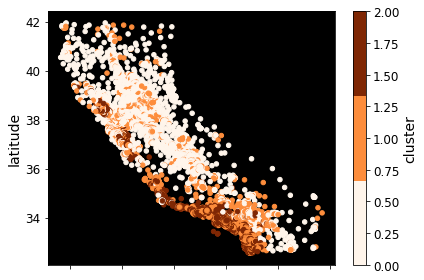

In [263]:
copy = housing_data.copy()

# append the cluster values to original dataset so we can plot them together
cluster_values = []
for x in range(len(final_pairs)):
  cluster_values.append(final_pairs[x][1])

copy['cluster'] = cluster_values

# change colors so it is clear where the clusters are on the map
plt.rcParams['axes.facecolor'] = 'black'
copy.plot(kind="scatter", x="longitude", y="latitude",
                  c="cluster", cmap=plt.cm.get_cmap("Oranges", 3))

### K = 4 Clusters

In [264]:
# run the k_means algorithm
k = 4
p = 1
final_centroids, final_pairs = k_means(housing_prepared,k, p)

# print cluster means
print_cluster_mean(final_centroids)

# calculate and return sse
sse = calculate_sse(final_centroids, housing_prepared, final_pairs)
print("SSE: " + str(sse))
sse_list.append(sse)

Mean values for cluster[1]:

Longitude: -0.07771931194423093
Latitude: 0.0561197235712866
Housing Median Age: 0.03657351168260764
Total Rooms: -0.010809225354428399
Total Bedrooms: -0.01393860242148631
Population: -0.017606220926910995
Households: -0.012586573865744417
Median Income: 0.022909559083112065
Median House Value: 0.03828061243173642

Mean values for cluster[2]:

Longitude: 0.012297205064106828
Latitude: -0.012451193798775
Housing Median Age: -0.03586356507567199
Total Rooms: 0.05929430956069735
Total Bedrooms: 0.06231874364412517
Population: 0.05932456274822111
Households: 0.06327769826371245
Median Income: 0.0032481408828303466
Median House Value: 0.0022003866558720944

Mean values for cluster[3]:

Longitude: -0.016979121696137876
Latitude: 0.03988245310287647
Housing Median Age: -0.008964566172542213
Total Rooms: -0.023577192562472808
Total Bedrooms: -0.025779125837329313
Population: -0.02623593808443979
Households: -0.028622951465499574
Median Income: -0.02400881441214949

In [265]:
# print standard deviations
centroids_std = calculate_standard_deviation(final_centroids, housing_prepared, final_pairs)
print_centroids_std(final_centroids, k)

Standard deviation values for cluster[1]:

Longitude: 0.30379441362706877
Latitude: 0.22328360496994434
Housing Median Age: 0.28186754559342203
Total Rooms: 0.17328256317210633
Total Bedrooms: 0.1773435536342765
Population: 0.16985212063866348
Households: 0.18567015135604803
Median Income: 0.2903162933327121
Median House Value: 0.28921528051854123

Standard deviation values for cluster[2]:

Longitude: 0.2356272765948899
Latitude: 0.23130118144925768
Housing Median Age: 0.23661554719794584
Total Rooms: 0.39869515098462216
Total Bedrooms: 0.3934441744036336
Population: 0.393836024214923
Households: 0.3899944410689771
Median Income: 0.21817077901160467
Median House Value: 0.22041173796154526

Standard deviation values for cluster[3]:

Longitude: 0.24708132796873558
Latitude: 0.2832812782396668
Housing Median Age: 0.23227583875950672
Total Rooms: 0.13437434014737706
Total Bedrooms: 0.1408255366605287
Population: 0.1465253205806678
Households: 0.14374640973352049
Median Income: 0.2049221031

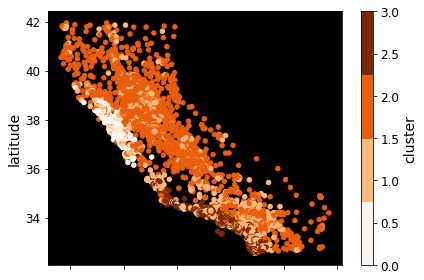

In [266]:
copy = housing_data.copy()

# append the cluster values to original dataset so we can plot them together
cluster_values = []
for x in range(len(final_pairs)):
  cluster_values.append(final_pairs[x][1])

copy['cluster'] = cluster_values

# change colors so it is clear where the clusters are on the map
plt.rcParams['axes.facecolor'] = 'black'
copy.plot(kind="scatter", x="longitude", y="latitude",
                  c="cluster", cmap=plt.cm.get_cmap("Oranges", 4))

### K = 5 Clusters

In [267]:
# run the k_means algorithm
k = 5
p = 1
final_centroids, final_pairs = k_means(housing_prepared,k, p)

# print cluster means
print_cluster_mean(final_centroids)

# calculate and return sse
sse = calculate_sse(final_centroids, housing_prepared, final_pairs)
print("SSE: " + str(sse))
sse_list.append(sse)

Mean values for cluster[1]:

Longitude: -0.07913977673037008
Latitude: 0.057986633577804425
Housing Median Age: 0.04240864047681517
Total Rooms: -0.006778222834385967
Total Bedrooms: -0.007188241581582538
Population: -0.01318003019275206
Households: -0.005804914535298745
Median Income: 0.013750379041569557
Median House Value: 0.033124254576001856

Mean values for cluster[2]:

Longitude: 0.01889741203220681
Latitude: -0.029333001793467962
Housing Median Age: -0.022967250484239227
Total Rooms: 0.04662096180756717
Total Bedrooms: 0.05321369062645218
Population: 0.05169905944929342
Households: 0.05584814505384817
Median Income: 0.009332943045833311
Median House Value: 0.022536453177789424

Mean values for cluster[3]:

Longitude: -0.0461425172208556
Latitude: 0.07064045635423574
Housing Median Age: -0.018824568746258107
Total Rooms: -0.006707485097742311
Total Bedrooms: -0.009365992135662827
Population: -0.010947710274866046
Households: -0.011038028370959163
Median Income: -0.02434428581890

In [268]:
# print standard deviations
centroids_std = calculate_standard_deviation(final_centroids, housing_prepared, final_pairs)
print_centroids_std(final_centroids, k)

Standard deviation values for cluster[1]:

Longitude: 0.30780583029896863
Latitude: 0.22726556684961163
Housing Median Age: 0.2926089247955903
Total Rooms: 0.19280769294631217
Total Bedrooms: 0.20121036885687169
Population: 0.18603204759376818
Households: 0.21068949472145623
Median Income: 0.2716689524811081
Median House Value: 0.28657686422378226

Standard deviation values for cluster[2]:

Longitude: 0.22181344825979704
Latitude: 0.2115639118475454
Housing Median Age: 0.2185547573432618
Total Rooms: 0.3543450069013989
Total Bedrooms: 0.3574787537353023
Population: 0.37173604274222904
Households: 0.3626738437900978
Median Income: 0.23781478905595893
Median House Value: 0.23326340447519772

Standard deviation values for cluster[3]:

Longitude: 0.22246708918489838
Latitude: 0.30738161556701515
Housing Median Age: 0.2375378145127927
Total Rooms: 0.22021960455863057
Total Bedrooms: 0.21216613211715946
Population: 0.2137353406451486
Households: 0.21807656055659744
Median Income: 0.195267424

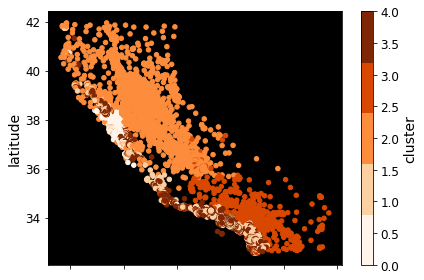

In [269]:
copy = housing_data.copy()

# append the cluster values to original dataset so we can plot them together
cluster_values = []
for x in range(len(final_pairs)):
  cluster_values.append(final_pairs[x][1])

copy['cluster'] = cluster_values

# change colors so it is clear where the clusters are on the map
plt.rcParams['axes.facecolor'] = 'black'
copy.plot(kind="scatter", x="longitude", y="latitude",
                  c="cluster", cmap=plt.cm.get_cmap("Oranges", 5))

### K = 6 Clusters

In [270]:
# run the k_means algorithm
k = 6
p = 1
final_centroids, final_pairs = k_means(housing_prepared,k, p)

# print cluster means
print_cluster_mean(final_centroids)
# calculate and return sse
sse = calculate_sse(final_centroids, housing_prepared, final_pairs)
print("SSE: " + str(sse))
sse_list.append(sse)

Mean values for cluster[1]:

Longitude: -0.0790065868650313
Latitude: 0.05973469494222817
Housing Median Age: 0.042473944042758054
Total Rooms: -0.0038272115547365077
Total Bedrooms: -0.0032731684865017633
Population: -0.010132658244492927
Households: -0.0016794500200363889
Median Income: 0.009385210694699641
Median House Value: 0.026716702835935604

Mean values for cluster[2]:

Longitude: 0.016243583012124845
Latitude: -0.03312294867342088
Housing Median Age: -0.017959524412368446
Total Rooms: 0.037924621477183035
Total Bedrooms: 0.044233480773579456
Population: 0.03535220828520107
Households: 0.0452137205741414
Median Income: 0.00045475462220027506
Median House Value: 0.01993373102065841

Mean values for cluster[3]:

Longitude: 0.022720727506511215
Latitude: -0.030965538686981063
Housing Median Age: 0.017314196205958955
Total Rooms: -0.02457037339843142
Total Bedrooms: -0.025956060868469244
Population: -0.02085742716788046
Households: -0.025057904291026074
Median Income: 0.0122052626

In [271]:
# print standard deviations
centroids_std = calculate_standard_deviation(final_centroids, housing_prepared, final_pairs)
print_centroids_std(final_centroids, k)

Standard deviation values for cluster[1]:

Longitude: 0.3071065974606108
Latitude: 0.2327610178117513
Housing Median Age: 0.3009433662614698
Total Rooms: 0.20399778057367146
Total Bedrooms: 0.21215536852342634
Population: 0.19368733533207785
Households: 0.2224103537021369
Median Income: 0.26006377977249096
Median House Value: 0.2781311688016732

Standard deviation values for cluster[2]:

Longitude: 0.2671502315333989
Latitude: 0.26467310613198197
Housing Median Age: 0.21478812203840686
Total Rooms: 0.3109770825508689
Total Bedrooms: 0.29791045664818
Population: 0.28944724350850487
Households: 0.30072774054574175
Median Income: 0.2386602007217043
Median House Value: 0.25307534911031454

Standard deviation values for cluster[3]:

Longitude: 0.2038792825984716
Latitude: 0.19944415982753871
Housing Median Age: 0.2248393564678402
Total Rooms: 0.12422890625894956
Total Bedrooms: 0.1271463915247793
Population: 0.12293238675311371
Households: 0.12574947599271255
Median Income: 0.27014313173124

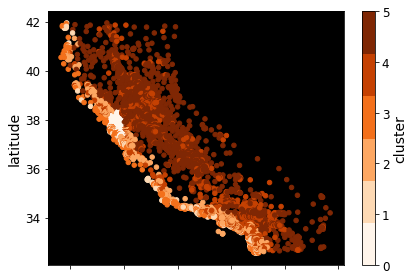

In [272]:
copy = housing_data.copy()

# append the cluster values to original dataset so we can plot them together
cluster_values = []
for x in range(len(final_pairs)):
  cluster_values.append(final_pairs[x][1])

copy['cluster'] = cluster_values

# change colors so it is clear where the clusters are on the map
plt.rcParams['axes.facecolor'] = 'black'
copy.plot(kind="scatter", x="longitude", y="latitude",
                  c="cluster", cmap=plt.cm.get_cmap("Oranges", 6))

### K = 7 Clusters

In [273]:
# run the k_means algorithm
k = 7
p = 1
final_centroids, final_pairs = k_means(housing_prepared,k, p)

# print cluster means
print_cluster_mean(final_centroids)
# calculate and return sse
sse = calculate_sse(final_centroids, housing_prepared, final_pairs)
print("SSE: " + str(sse))
sse_list.append(sse)

Mean values for cluster[1]:

Longitude: 0.053864256912470466
Latitude: -0.030086306562162123
Housing Median Age: -0.008041030702849034
Total Rooms: -0.021146251747651983
Total Bedrooms: -0.023148374545993132
Population: -0.022902876535491983
Households: -0.02777871580188704
Median Income: -0.01960828487062789
Median House Value: -0.03998446260799897

Mean values for cluster[2]:

Longitude: 0.026806108382907798
Latitude: -0.034043822814943135
Housing Median Age: 0.027393317898043685
Total Rooms: -0.03028608952939845
Total Bedrooms: -0.022762211934737823
Population: -0.015285702690001209
Households: -0.022284984908085455
Median Income: -0.027748112204514095
Median House Value: -0.010038738654343212

Mean values for cluster[3]:

Longitude: -0.07900915889115422
Latitude: 0.05974047778347988
Housing Median Age: 0.04248971474028958
Total Rooms: -0.0038335601512977037
Total Bedrooms: -0.0032747914377563594
Population: -0.010137412418567361
Households: -0.0016806846440276073
Median Income: 0.0

In [274]:
# print standard deviations
centroids_std = calculate_standard_deviation(final_centroids, housing_prepared, final_pairs)
print_centroids_std(final_centroids, k)

Standard deviation values for cluster[1]:

Longitude: 0.2464687887591866
Latitude: 0.16190402120985514
Housing Median Age: 0.23145370283740394
Total Rooms: 0.14473041939304765
Total Bedrooms: 0.15161054753503256
Population: 0.1386968187568907
Households: 0.1403718419723996
Median Income: 0.21774627852661455
Median House Value: 0.23813015700269619

Standard deviation values for cluster[2]:

Longitude: 0.19527510452430152
Latitude: 0.19771251089874267
Housing Median Age: 0.22503938418605904
Total Rooms: 0.134987622990589
Total Bedrooms: 0.12714869631951514
Population: 0.1315599744742974
Households: 0.12748419376617362
Median Income: 0.1639819054444345
Median House Value: 0.1753832497607272

Standard deviation values for cluster[3]:

Longitude: 0.30711636729120817
Latitude: 0.23278098552000784
Housing Median Age: 0.3010067882273658
Total Rooms: 0.20404002874497523
Total Bedrooms: 0.21220165495342733
Population: 0.1937293514418447
Households: 0.22245887490492497
Median Income: 0.2600472299

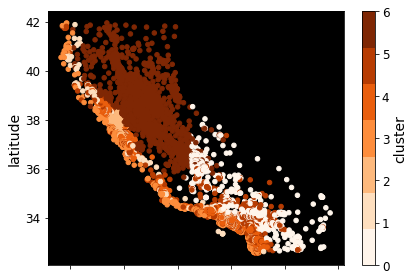

In [275]:
copy = housing_data.copy()

# append the cluster values to original dataset so we can plot them together
cluster_values = []
for x in range(len(final_pairs)):
  cluster_values.append(final_pairs[x][1])

copy['cluster'] = cluster_values

# change colors so it is clear where the clusters are on the map
plt.rcParams['axes.facecolor'] = 'black'
copy.plot(kind="scatter", x="longitude", y="latitude",
                  c="cluster", cmap=plt.cm.get_cmap("Oranges", 7))

### K = 8 Clusters

In [276]:
# run the k_means algorithm
k = 8
p = 1
final_centroids, final_pairs = k_means(housing_prepared,k, p)

# print cluster means
print_cluster_mean(final_centroids)
# calculate and return sse
sse = calculate_sse(final_centroids, housing_prepared, final_pairs)
print("SSE: " + str(sse))
sse_list.append(sse)

Mean values for cluster[1]:

Longitude: 0.020577060522539423
Latitude: -0.028614824707888946
Housing Median Age: 0.005792222142883634
Total Rooms: -0.018355811076845044
Total Bedrooms: -0.029186477679341568
Population: -0.025340486263712835
Households: -0.02772665865674254
Median Income: 0.05835932212625147
Median House Value: 0.04478510893252162

Mean values for cluster[2]:

Longitude: 0.025226514029305418
Latitude: -0.03273815121367796
Housing Median Age: 0.02982301964828247
Total Rooms: -0.03284576012117042
Total Bedrooms: -0.02656571741602475
Population: -0.01901058924220747
Households: -0.026312963526807343
Median Income: -0.031042724289394336
Median House Value: -0.012004228495723275

Mean values for cluster[3]:

Longitude: 0.004126761983041937
Latitude: -0.021840258650814758
Housing Median Age: 0.01441552179264265
Total Rooms: -0.022797197596902893
Total Bedrooms: -0.022261218550750007
Population: -0.02533199476105892
Households: -0.02252633245979937
Median Income: 0.00270795361

In [277]:
# print standard deviations
centroids_std = calculate_standard_deviation(final_centroids, housing_prepared, final_pairs)
print_centroids_std(final_centroids, k)

Standard deviation values for cluster[1]:

Longitude: 0.2120758166229893
Latitude: 0.1997004122030511
Housing Median Age: 0.22377509719324
Total Rooms: 0.10694341226878037
Total Bedrooms: 0.13093648564541613
Population: 0.12469121436120334
Households: 0.12772014741380075
Median Income: 0.337370501219772
Median House Value: 0.2816542469557973

Standard deviation values for cluster[2]:

Longitude: 0.1989255495287143
Latitude: 0.20036806070379196
Housing Median Age: 0.2293657193708282
Total Rooms: 0.1417451819968332
Total Bedrooms: 0.12680738221551208
Population: 0.12380001502949857
Households: 0.12741260350323516
Median Income: 0.16498290630021767
Median House Value: 0.17826823341084008

Standard deviation values for cluster[3]:

Longitude: 0.2895444835933182
Latitude: 0.2815786046746902
Housing Median Age: 0.23136651824056476
Total Rooms: 0.12184033037966027
Total Bedrooms: 0.12668701333150564
Population: 0.13732988948739028
Households: 0.12772920567645585
Median Income: 0.2583869133886

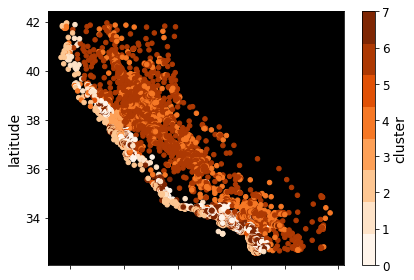

In [278]:
copy = housing_data.copy()

# append the cluster values to original dataset so we can plot them together
cluster_values = []
for x in range(len(final_pairs)):
  cluster_values.append(final_pairs[x][1])

copy['cluster'] = cluster_values

# change colors so it is clear where the clusters are on the map
plt.rcParams['axes.facecolor'] = 'black'
copy.plot(kind="scatter", x="longitude", y="latitude",
                  c="cluster", cmap=plt.cm.get_cmap("Oranges", 8))

### K = 9 Clusters

In [279]:
# run the k_means algorithm
k = 9
p = 1
final_centroids, final_pairs = k_means(housing_prepared,k, p)

# print cluster means
print_cluster_mean(final_centroids)
# calculate and return sse
sse = calculate_sse(final_centroids, housing_prepared, final_pairs)
print("SSE: " + str(sse))
sse_list.append(sse)

Mean values for cluster[1]:

Longitude: -0.0020693793334176894
Latitude: 0.026602001087792808
Housing Median Age: -0.04761256244540629
Total Rooms: 0.06028581753830058
Total Bedrooms: 0.05864263452510807
Population: 0.052593798660659316
Households: 0.05416443787772421
Median Income: -0.017451541314272862
Median House Value: -0.04089104608739023

Mean values for cluster[2]:

Longitude: 0.020486668348590097
Latitude: -0.02853018131119745
Housing Median Age: 0.007261656636110174
Total Rooms: -0.01941478027899589
Total Bedrooms: -0.02988693204788595
Population: -0.026356895117415086
Households: -0.02844034719134477
Median Income: 0.05787846894416545
Median House Value: 0.044862686931442804

Mean values for cluster[3]:

Longitude: 0.046499001113881805
Latitude: -0.05897593278835525
Housing Median Age: 0.00021806983611338048
Total Rooms: -0.012343240101054979
Total Bedrooms: -0.0007847212709705876
Population: -0.0044726749592442615
Households: -0.0008537138388467799
Median Income: -0.0302678

In [280]:
# print standard deviations
centroids_std = calculate_standard_deviation(final_centroids, housing_prepared, final_pairs)
print_centroids_std(final_centroids, k)

Standard deviation values for cluster[1]:

Longitude: 0.2430002387755646
Latitude: 0.2658977659270472
Housing Median Age: 0.26351537976891676
Total Rooms: 0.3990899810101269
Total Bedrooms: 0.3876300823164874
Population: 0.38334758694860893
Households: 0.37001557572028276
Median Income: 0.16226080186555472
Median House Value: 0.19182095404101518

Standard deviation values for cluster[2]:

Longitude: 0.21165348899959413
Latitude: 0.1992179127327672
Housing Median Age: 0.22323184390221665
Total Rooms: 0.10747204980060437
Total Bedrooms: 0.1326189446778116
Population: 0.12587911687923692
Households: 0.12946345776966064
Median Income: 0.3364726236516448
Median House Value: 0.2826140274344212

Standard deviation values for cluster[3]:

Longitude: 0.25278579872547596
Latitude: 0.28093838335182586
Housing Median Age: 0.21744860909763453
Total Rooms: 0.15639639782241038
Total Bedrooms: 0.18566456780070645
Population: 0.1877007302159528
Households: 0.184091376524344
Median Income: 0.17490455297

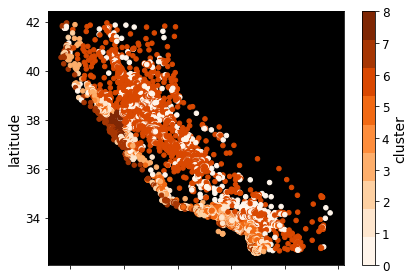

In [281]:
copy = housing_data.copy()

# append the cluster values to original dataset so we can plot them together
cluster_values = []
for x in range(len(final_pairs)):
  cluster_values.append(final_pairs[x][1])

copy['cluster'] = cluster_values

# change colors so it is clear where the clusters are on the map
plt.rcParams['axes.facecolor'] = 'black'
copy.plot(kind="scatter", x="longitude", y="latitude",
                  c="cluster", cmap=plt.cm.get_cmap("Oranges", 9))

### K = 10 Clusters

In [282]:
# run the k_means algorithm
k = 10
p = 1
final_centroids, final_pairs = k_means(housing_prepared,k, p)

# print cluster means
print_cluster_mean(final_centroids)
# calculate and return sse
sse = calculate_sse(final_centroids, housing_prepared, final_pairs)
print("SSE: " + str(sse))
sse_list.append(sse)

Mean values for cluster[1]:

Longitude: 0.007139566854046417
Latitude: 0.013827070790498035
Housing Median Age: -0.04704365445114996
Total Rooms: 0.06499113549948755
Total Bedrooms: 0.06333031645035052
Population: 0.06085939528391774
Households: 0.061780392133889056
Median Income: -0.01596852822758093
Median House Value: -0.037563583510418365

Mean values for cluster[2]:

Longitude: -0.07936693271944718
Latitude: 0.057481914113985955
Housing Median Age: 0.013767503001519023
Total Rooms: 0.048134279314673185
Total Bedrooms: 0.05418539721013567
Population: 0.03861567158942991
Households: 0.057921888106662406
Median Income: 0.011643785100986669
Median House Value: 0.041922807547425625

Mean values for cluster[3]:

Longitude: 0.061274965796061336
Latitude: -0.039087325619676656
Housing Median Age: -0.005025933334952425
Total Rooms: -0.02309542569676681
Total Bedrooms: -0.025660717531216393
Population: -0.02509627087737687
Households: -0.030063585952854497
Median Income: -0.0156341210784948

In [283]:
# print standard deviations
centroids_std = calculate_standard_deviation(final_centroids, housing_prepared, final_pairs)
print_centroids_std(final_centroids, k)

Standard deviation values for cluster[1]:

Longitude: 0.24274514653117996
Latitude: 0.26409353797705737
Housing Median Age: 0.26356123131363457
Total Rooms: 0.41889280468223633
Total Bedrooms: 0.39903555426186665
Population: 0.3869058300711667
Households: 0.3813855145198733
Median Income: 0.17145184622281753
Median House Value: 0.19252539980163205

Standard deviation values for cluster[2]:

Longitude: 0.30913633419179376
Latitude: 0.22691600355151254
Housing Median Age: 0.2642544651101396
Total Rooms: 0.30249681772759596
Total Bedrooms: 0.3123288592470491
Population: 0.2701377402546919
Households: 0.33206707612867914
Median Income: 0.22145271633595962
Median House Value: 0.2833456646532241

Standard deviation values for cluster[3]:

Longitude: 0.26508279584375855
Latitude: 0.16853120744538455
Housing Median Age: 0.240354986651367
Total Rooms: 0.1436281670207548
Total Bedrooms: 0.14998161155946643
Population: 0.14341051138922234
Households: 0.1439736066777683
Median Income: 0.2214364875

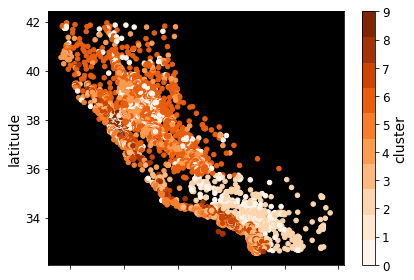

In [284]:
copy = housing_data.copy()

# append the cluster values to original dataset so we can plot them together
cluster_values = []
for x in range(len(final_pairs)):
  cluster_values.append(final_pairs[x][1])

copy['cluster'] = cluster_values

# change colors so it is clear where the clusters are on the map
plt.rcParams['axes.facecolor'] = 'black'
copy.plot(kind="scatter", x="longitude", y="latitude",
                  c="cluster", cmap=plt.cm.get_cmap("Oranges", 10))

### Analysis on Changing Cluster Count

Text(0, 0.5, 'SSE/Inertia')

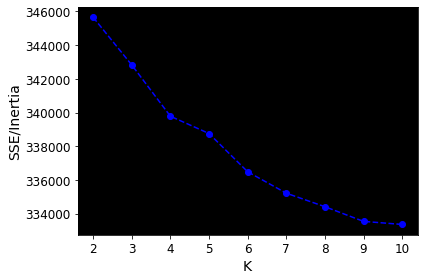

In [291]:
# Create array with K values
k_vals = [2,3,4,5,6,7,8,9,10]

# Plot inertia (sse values we calculated for each k value) against k values
plt.plot(k_vals, sse_list, "--bo")
plt.xlabel("K")
plt.ylabel("SSE/Inertia")

As you can see from the graph above, our inertia values perform as expected, with a decreasing elbow curve. The "elbow" occurs around 6 clusters according to this graph - how about the cluster graphs for each k value? 

Visually, as the number of clusters increases, the shape of the map changes significantly from 2 to 5 clusters. However, beyond k = 6 clusters, the map does not change significantly - although clusters become smaller and more targeted to specific areas. This supports the inertia graph above, where the "elbow" occurs at k=6. Also, if you compare the cluster map of k = 6 to the map of k = 10 clusters, for example, you will not see much of a difference. This further suggests that the optimal amount of clusters for my algorithm is around 6 before overfitting/not generalizing. 

Additionally, as the number of clusters increases, the clusters become noticeably centered around cities such as the high income, high population, expensive areas like the Bay (palo alto, san francisco) as well as southern cities like los angeles, san diego and newport beach - especially looking at the k=10 graph. There are also others clusters surrounding them which suggests that there housing market is not the same a few miles out of the city - as one would expect.

Finally, if you look at the k=8 graph, you will notice a cluster runs pretty much along the whole coastal border of California - minus when it runs through/past the big cities. As someone looking to buy a beach property, I know that the housing market for ocean front or near-ocean properties is different than the city because location is more important. This is why I believe contributed it to being in its own cluster.

# **Step 4:** Writing on the Intuition for the California Housing Crisis

I have mentioned this point already, but there is clear evidence showing the housing disparity between cities and rural areas in California. You can see this with clusters being narrowly focused in big cities like SF, LA, San Diego, Silicon Valley etc. This is best shown starting at k=5, and increasing the number of clusters slightly narrows the geographical size of these clusters but illustrates the same trend. 

The k-means algorithm and the generated graphs can help explain the housing crisis because there is simply not enough affordable housing in these areas. It isn't as simple as higher house value though, because the population of these areas also contributes to a shortage in those areas. However, in many of the graphs, there is clearly a large cluster more eastern of the coast/major cities, which suggest the problem is more about population than anything. If people were to move out of the large cities and move into more affordable housing, the median prices of housing should drop (less demand) and help solve the housing crisis. 

Luckily, this is happening already with Covid-19 letting people work from home. People are leaving the Bay Area and LA (including myself) because there is more affordable housing outside these areas, fewer people, and a larger supply of cheaper housing. I think the best and quickest solution to the housing crisis is for more people to leave the big cities, and to have companies offer flexibility and incentives in working from home. Another solution could be to relocate companies, or at least some of their offices, to the more eastern part of California. They would save money and spread the population more evenly among the state. At the same time, it would reduce demand for expensive housing in the large cities, thereby driving prices down and increasing the affordability of housing. 